<a href="https://colab.research.google.com/github/ktchanu/NLP/blob/main/IntroductionNLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#I. PREPROCESSING

Import required libraries

In [ ]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random

Download the required dataset

In [ ]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to /root/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

Sample view into the dataset and sectioning 

In [ ]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')

In [ ]:
print('Number of positive tweets: ', len(all_positive_tweets))
print('Number of negative tweets: ', len(all_negative_tweets))

print('\nThe type of all_positve_tweets is: ', type(all_positive_tweets))
print('The type of tweets entry is: ', type(all_negative_tweets[0]))

Number of positive tweets:  5000
Number of negative tweets:  5000

The type of all_positve_tweets is:  <class 'list'>
The type of tweets entry is:  <class 'str'>


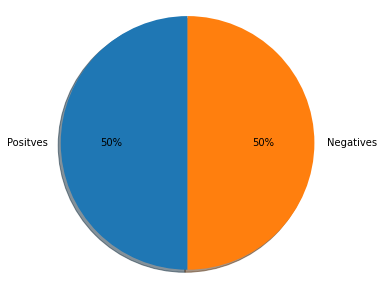

In [ ]:
fig = plt.figure(figsize = (5,5))
labels = 'Positves', 'Negatives'
sizes = [len(all_positive_tweets), len(all_negative_tweets)]
plt.pie(sizes, labels = labels, autopct = '%1.f%%', shadow = True, startangle = 90)
plt.axis('equal')
plt.show()